## Day 2: Visualizing Swiss Tourism Trends (2019–2023)

### Objective:
To build clear, insightful, and visually engaging plots to highlight trends in Swiss tourism over the last five years.

### Visualizations Created:

1. **Total Tourism Trend (2019–2023)**  
   - Line chart showing the impact of COVID and post-pandemic recovery.
   - Key Insight: 2020–2021 drop; strong recovery in 2022–2023.

2. **Region-wise Tourism (Stacked Bar)**  
   - Each region’s contribution across all years.
   - Key Insight: Zurich, Bern, Valais lead consistently.

3. **Swiss vs Foreign Tourists (Side-by-side Bar)**  
   - Shows how Swiss tourism stayed strong during COVID.
   - Key Insight: Foreign tourism crashed, Swiss travel supported industry.

4. **Top 5 Regions in 2023**  
   - Horizontal bar chart.
   - Key Insight: Zurich leads by a huge margin, followed by Bern, Lucerne.

5. **Zurich vs Geneva vs Bern Trendline**  
   - Multi-line plot comparing key regions over time.
   - Key Insight: Zurich shows strongest growth and recovery post-COVID.

### Output:
 [All charts saved in the "Charts" folder for use in README and LinkedIn](Charts) 

> These visualizations transform raw numbers into compelling insights — essential for data-driven tourism strategies and decision-making.


In [17]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the cleaned CSV file
df = pd.read_csv("data/Cleaned_tourism_data_2019-2023.csv")

#Set seaborn style
sns.set(style="whitegrid")

#Quick check
df.head()


,Year,Region,Swiss,Foreigners,Total
0,2019,Graubünden,3208122,2047894,5256016
1,2019,Eastern Switzerland,1253631,643506,1897137
2,2019,Zurich Region,2162267,4371968,6534235
3,2019,Lucerne / Lake Lucerne,1594059,2318318,3912377
4,2019,Basel Region,624003,1082584,1706587


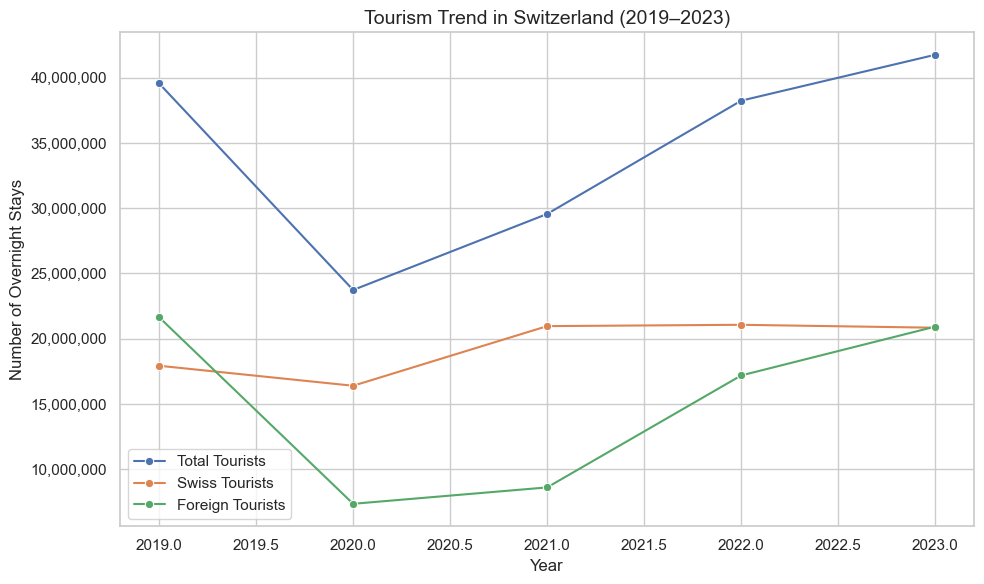

In [18]:
#Group data by year and sum all totals
total_year = df.groupby("Year")[["Swiss", "Foreigners", "Total"]].sum().reset_index()

#Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x="Year", y="Total", data=total_year, marker='o', label="Total Tourists")
sns.lineplot(x="Year", y="Swiss", data=total_year, marker='o', label="Swiss Tourists")
sns.lineplot(x="Year", y="Foreigners", data=total_year, marker='o', label="Foreign Tourists")

plt.title("Tourism Trend in Switzerland (2019–2023)", fontsize=14)
plt.ylabel("Number of Overnight Stays")

import matplotlib.ticker as ticker
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xlabel("Year")
plt.legend()
plt.tight_layout()
plt.savefig("Charts/total_tourism_trend.png", dpi=300)
plt.show()


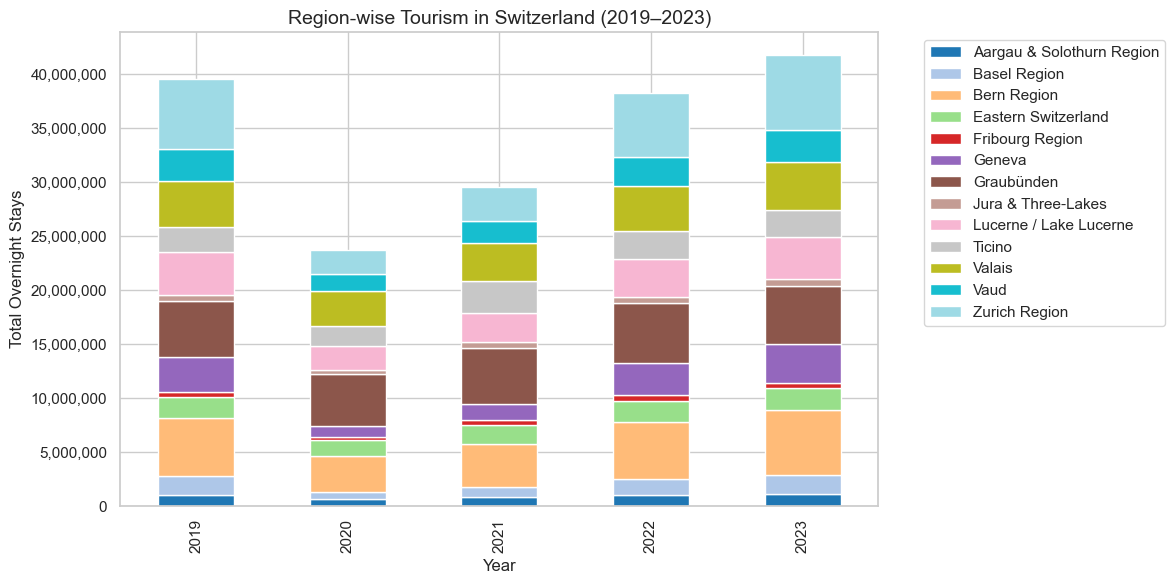

In [19]:
#Pivot data for plotting
region_pivot = df.pivot_table(index="Year", columns="Region", values="Total", aggfunc="sum")

#Plot stacked bar chart
region_pivot.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab20")
plt.title("Region-wise Tourism in Switzerland (2019–2023)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Overnight Stays")

import matplotlib.ticker as ticker
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("Charts/region_year_stacked_bar.png", dpi=300)
plt.show()


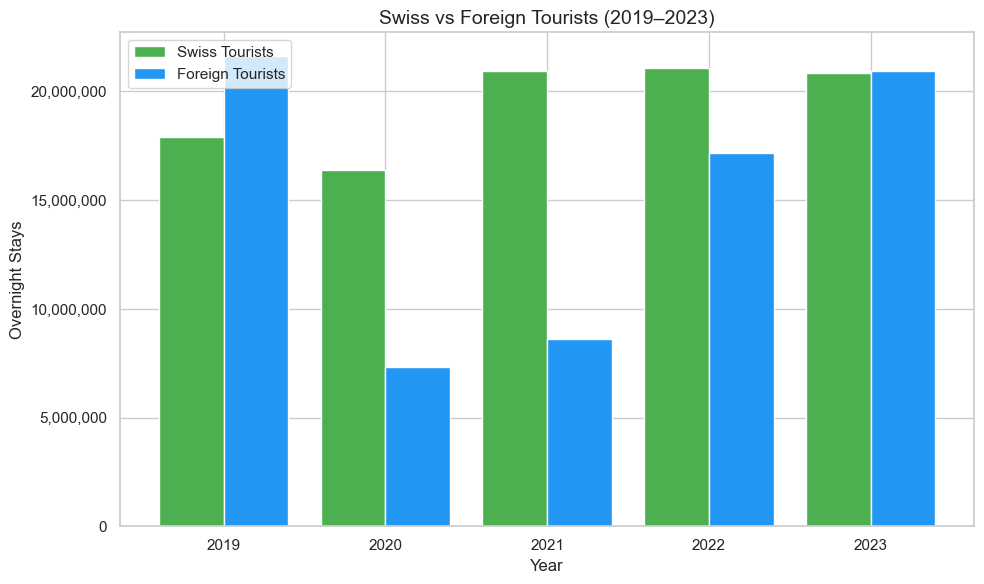

In [20]:
#Group by year and sum Swiss & Foreigners
yearly_visitors = df.groupby("Year")[["Swiss", "Foreigners"]].sum().reset_index()

#Plot side-by-side bars
plt.figure(figsize=(10, 6))
bar_width = 0.4
x = yearly_visitors["Year"]

plt.bar(x - bar_width/2, yearly_visitors["Swiss"], width=bar_width, label="Swiss Tourists", color="#4CAF50")
plt.bar(x + bar_width/2, yearly_visitors["Foreigners"], width=bar_width, label="Foreign Tourists", color="#2196F3")

plt.title("Swiss vs Foreign Tourists (2019–2023)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Overnight Stays")

import matplotlib.ticker as ticker
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xticks(yearly_visitors["Year"])
plt.legend()
plt.tight_layout()
plt.savefig("Charts/swiss_vs_foreigners_by_year.png", dpi=300)
plt.show()


C:\Users\vijai\AppData\Local\Temp\ipykernel_14580\3070390302.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5, x="Total", y="Region", palette="viridis")


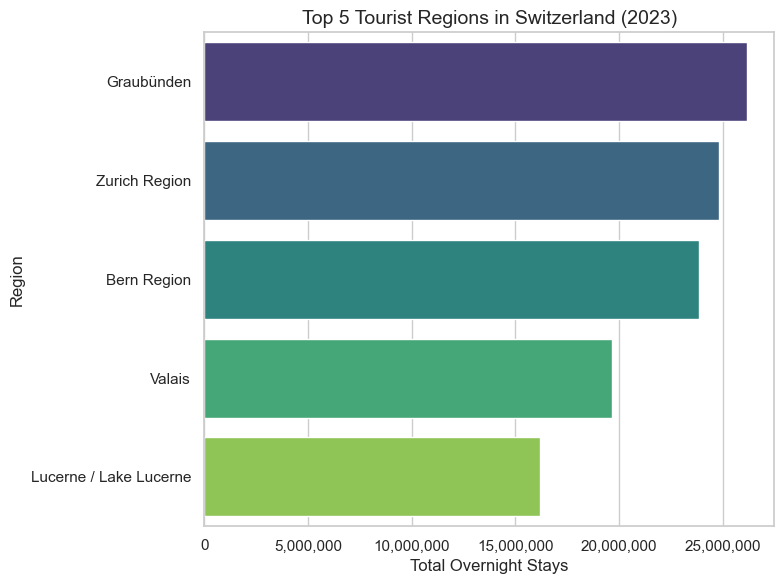

In [22]:
#Bar plot of top 5 regions
top5 = df.groupby('Region')['Total'].sum().sort_values(ascending=False).head(5).reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=top5, x="Total", y="Region", palette="viridis")

plt.title("Top 5 Tourist Regions in Switzerland (2023)", fontsize=14)
plt.xlabel("Total Overnight Stays")
plt.ylabel("Region")

#Format x-axis numbers with commas
import matplotlib.ticker as ticker
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.savefig("charts/top5_regions_2023.png", dpi=300)
plt.show()


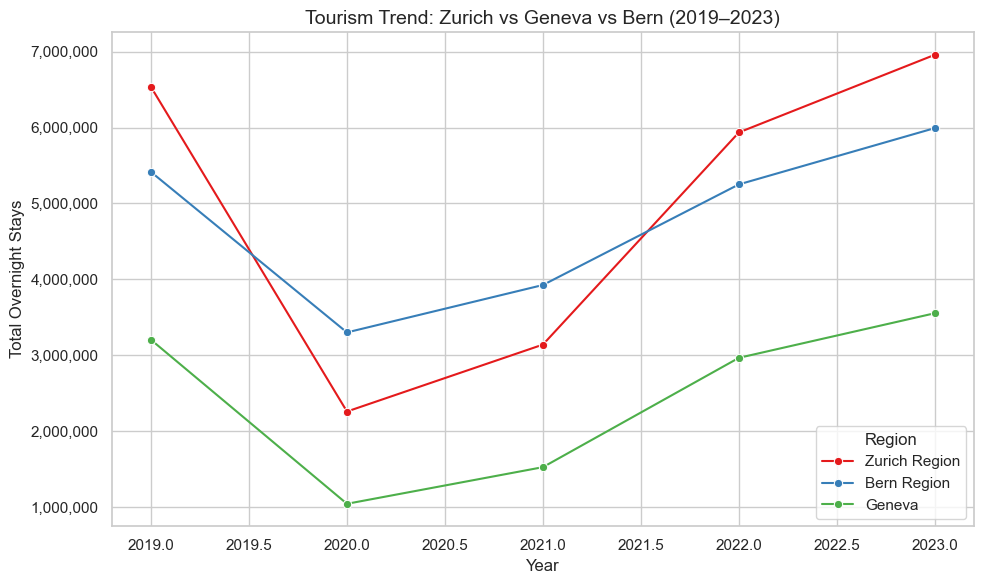

In [23]:
#Filter only 3 key regions
top_regions = ['Zurich Region', 'Geneva', 'Bern Region']
df_top = df[df['Region'].isin(top_regions)]

#Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_top, x='Year', y='Total', hue='Region', marker='o', palette='Set1')

plt.title("Tourism Trend: Zurich vs Geneva vs Bern (2019–2023)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Overnight Stays")

#Format y-axis with commas (no 1e6)
import matplotlib.ticker as ticker
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.legend(title='Region')
plt.tight_layout()
plt.savefig("Charts/zurich_geneva_bern_trend.png", dpi=300)
plt.show()
